In [1]:
%config Completer.use_jedi = False

In [2]:
import os
import sys
import time
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

tqdm.pandas()

In [44]:
aspects = pd.read_csv('data/aspects.csv').set_index("aspect_id")
features = pd.read_csv('data/features.csv').set_index('feature_id')
organizations = pd.read_csv('data/organisations.csv').set_index('org_id')
reviews = pd.read_csv('data/reviews.csv')
rubrics = pd.read_csv('data/rubrics.csv').set_index('rubric_id')
test_users = pd.read_csv('data/test_users.csv')
users = pd.read_csv('data/users.csv')

/home/maxon/anaconda3/envs/core_ds/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
organizations_extra = pd.DataFrame(organizations.org_id)

def get_rubric_by_ids(ids):
    rubric_name = np.NaN
    ids = ids.split()
    np.random.shuffle(ids)
    
    for _id in ids:
        _id = int(_id)
        if _id in rubrics.index:
            rubric_name = rubrics.loc[_id].item()
            break
    return rubric_name

organizations_extra['rubrics'] = organizations['rubrics_id'].apply(lambda x: len(x.split()))
organizations_extra['first_rubric'] = organizations['rubrics_id'].progress_apply(get_rubric_by_ids)
organizations_extra['number_of_features'] = organizations['features_id'].apply(lambda x: len(x.split()) if type(x is str else 0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66405/66405 [00:04<00:00, 14720.56it/s]


In [37]:
features = list(map(lambda x: x.split() if type(x) is str else [], organizations.features_id.values))

In [38]:
features = [item for single_organization in features for item in single_organization]

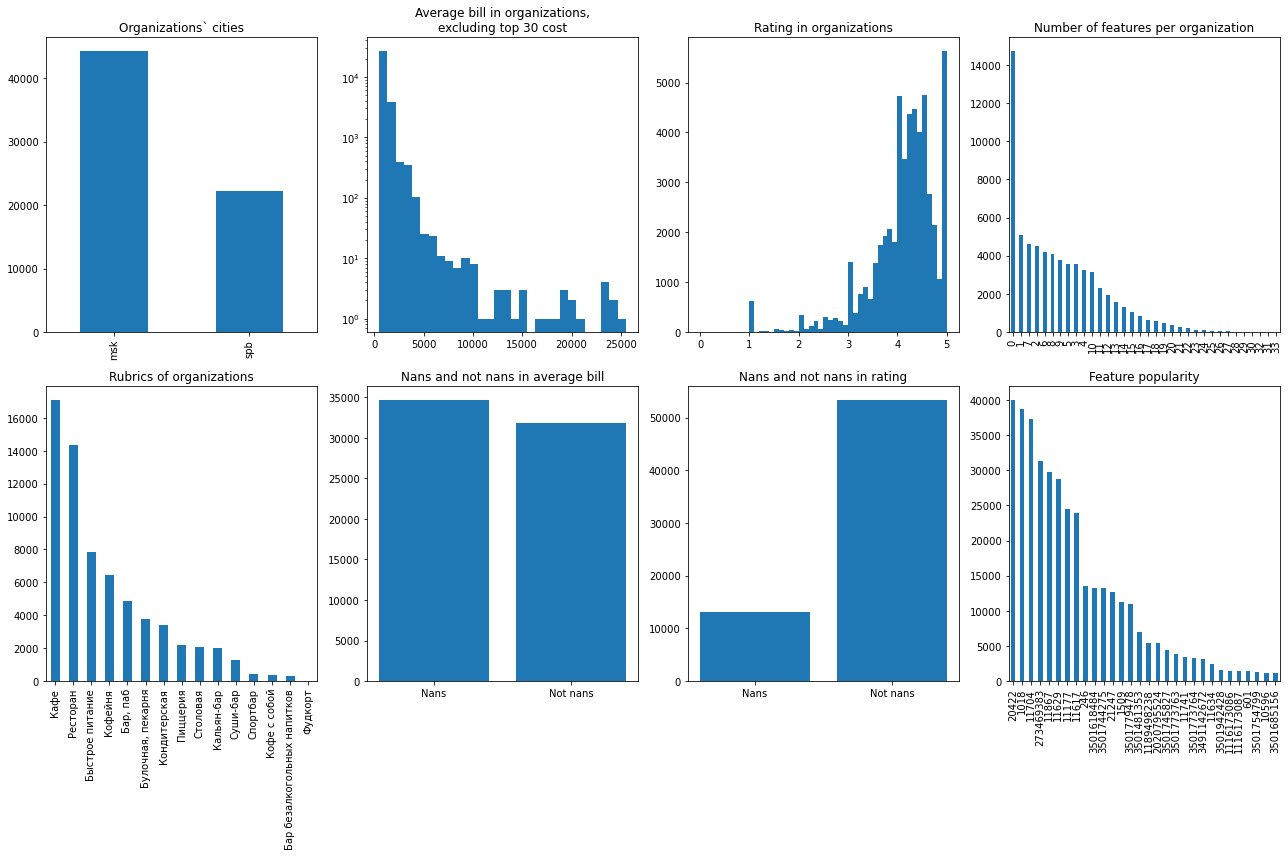

In [39]:
fig, ax = plt.subplots(2, 4, figsize=(18, 12))
organizations.city.value_counts().plot.bar(ax=ax[0][0], title='Organizations` cities')
organizations_extra.first_rubric.value_counts().plot.bar(ax=ax[1, 0], title='Rubrics of organizations')

ax[0][1].hist(sorted(organizations.average_bill.dropna().values)[:-30], log=True, bins=30)
ax[0][1].set_title("Average bill in organizations,\nexcluding top 30 cost")

ax[1][1].bar(["Nans", "Not nans"], [organizations.average_bill.isna().sum(), organizations.average_bill.notna().sum()])
ax[1][1].set_title("Nans and not nans in average bill")

ax[0][2].hist(organizations.rating, bins=50)
ax[0][2].set_title("Rating in organizations")

ax[1][2].bar(["Nans", "Not nans"], [organizations.rating.isna().sum(), organizations.rating.notna().sum()])
ax[1][2].set_title("Nans and not nans in rating")

organizations_extra['number_of_features'].value_counts().plot.bar(ax=ax[0, 3], title='Number of features per organization')
pd.Series(features).value_counts()[:30].plot.bar(ax=ax[1, 3], title='Feature popularity')
plt.tight_layout()
plt.show()